In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [10]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [14]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='valid',input_shape=[28,28,1],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [17]:
model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=20,callbacks=[early])

Epoch 1/20


2023-04-13 20:58:43.126136: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 15s 8ms/step - loss: 0.2203 - accuracy: 0.9342 - val_loss: 0.0840 - val_accuracy: 0.9736
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0804 - accuracy: 0.9752 - val_loss: 0.0672 - val_accuracy: 0.9783
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0576 - val_accuracy: 0.9811
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0612 - val_accuracy: 0.9792
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0500 - val_accuracy: 0.9839
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0490 - val_accuracy: 0.9862
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0418 - val_accuracy: 0.9

In [18]:
loss=pd.DataFrame(model.history.history)

<Axes: >

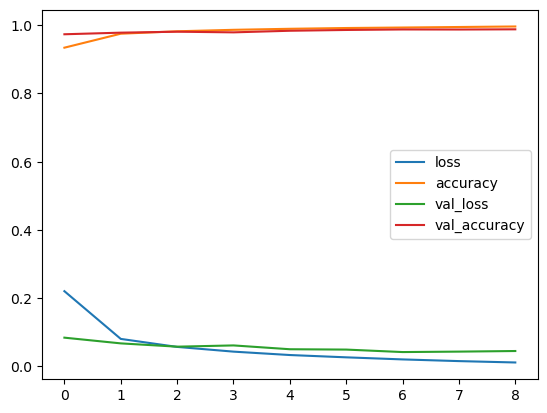

In [19]:
loss.plot()

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               147584    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149,194
Trainable params: 149,194
Non-trainable params: 0
________________________________________________

In [21]:
pred=(model.predict(x_test)>0.5).astype('int32')

313/313 [==============================] - 1s 2ms/step


In [22]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [23]:
print(classification_report(y_test_cat.argmax(axis=1),pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



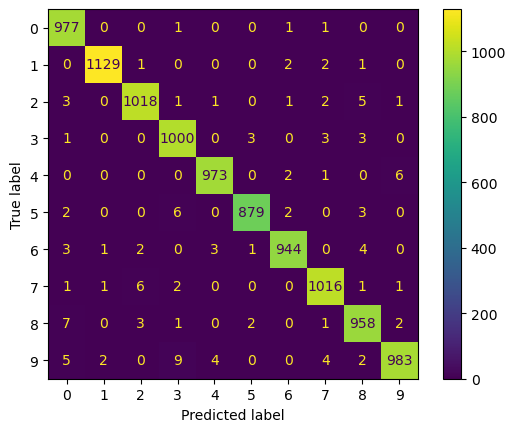

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test_cat.argmax(axis=1),pred.argmax(axis=1))